In [1]:
import matplotlib.pyplot as plt
import numpy as np

from metpy.cbook import get_test_data
from metpy.calc import get_wind_components
from metpy.calc import tools
from metpy.plots import SkewT

%matplotlib inline

# Change default to be better for skew-T
plt.rcParams['figure.figsize'] = (9, 9)

In [2]:
# Parse the data
p, T, Td, direc, spd = np.loadtxt(get_test_data('sounding_data.txt'),
        usecols=(0, 2, 3, 6, 7), skiprows=4, unpack=True)
u, v = get_wind_components(spd, np.deg2rad(direc))

/Users/jleeman/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Users/jleeman/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


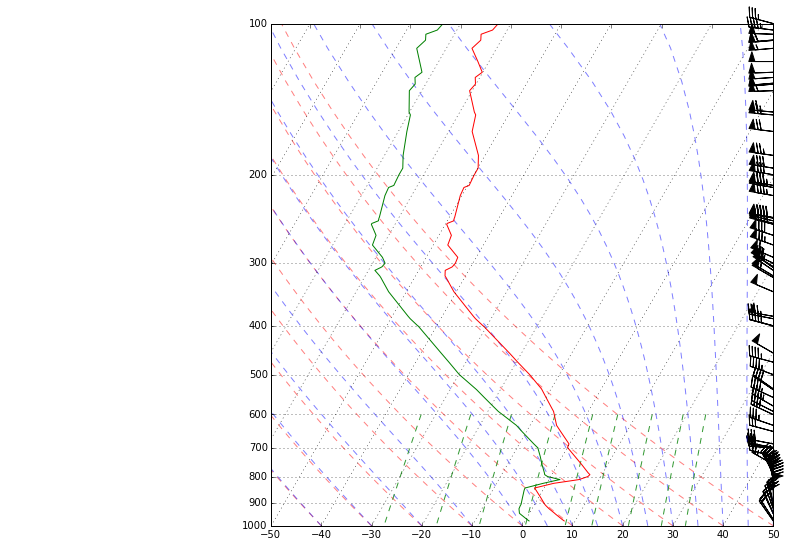

In [3]:
# Create a skewT using matplotlib's default figure size
skew = SkewT()

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p, u, v)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_ylim(1000, 100)

# Show the plot
plt.show()

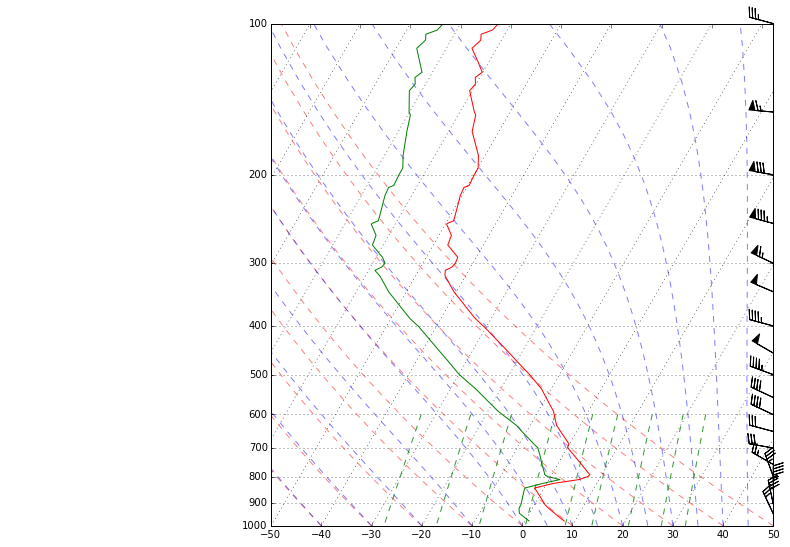

In [4]:
#Example of defining your own vertical barb spacing

skew = SkewT()

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')

#Set spacing interval
#Example: Every 50 mb from 1000 to 100 mb
my_interval = range(100,1000,50)

#Get indexes of values closest to defined interval
ix = tools.resample_nn_1d(p,my_interval)

#Plot only values nearest to defined interval values
skew.plot_barbs(p[ix], u[ix], v[ix])

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_ylim(1000, 100)

# Show the plot
plt.show()